In [1]:
%use hyper-collate

Welcome to HyperCollate 1.3.5-SNAPSHOT-2
Using GraphViz: dot - graphviz version 2.40.1 (20161225.0304)



# Vincent's case

In [2]:
val wA = HC.importXMLWitness("A", "<e>well <subst><del>in his own way</del><add>at his own pace</add></subst>.</e>")
val wB = HC.importXMLWitness("B", "<e>well at his own gait.</e>")
val collationGraph = HC.collate(wA,wB)
collationGraph.asASCIITable()

┌───┬─────┬───────┬────────┬────────┬────────┬─┐
│[A]│     │[+]  at│[+]  his│[+]  own│[+] pace│ │
│   │well │[-] in │[-] his │[-] own │[-] way │.│
├───┼─────┼───────┼────────┼────────┼────────┼─┤
│[B]│well │at     │his     │own     │gait    │.│
└───┴─────┴───────┴────────┴────────┴────────┴─┘

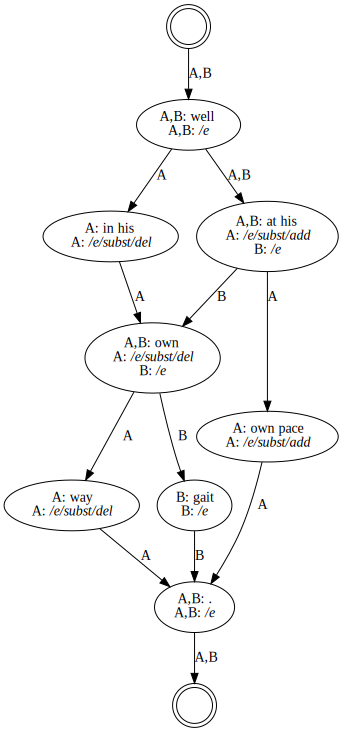

In [3]:
collationGraph.show()

# 1: Duplicates in add en del branches

Gewenste uitkomst: Moet alleen de add volgen.

In [4]:
val wA = HC.importXMLWitness("A", "<root>a long <subst><add>text that is very long</add><del>text that is different</del></subst></root>")
val wB = HC.importXMLWitness("B", "<root>a long text that is very long</root>")
val collationGraph = HC.collate(wA,wB)
collationGraph.asASCIITable()

┌───┬──┬─────┬─────────┬─────────┬───────┬─────────────┬────────┐
│[A]│  │     │[+]  text│[+]  that│[+]  is│[+]      very│        │
│   │a │long │[-] text │[-] that │[-] is │[-] different│[+] long│
├───┼──┼─────┼─────────┼─────────┼───────┼─────────────┼────────┤
│[B]│a │long │text     │that     │is     │very         │long    │
└───┴──┴─────┴─────────┴─────────┴───────┴─────────────┴────────┘

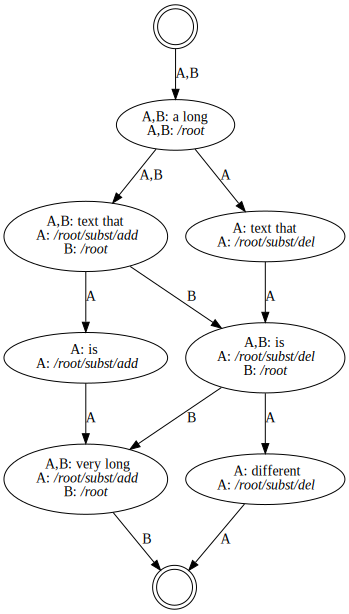

In [5]:
collationGraph.show()

## 1a: add/del reversed

In [6]:
val wA = HC.importXMLWitness("A", "<root>a long <subst><del>text that is different</del><add>text that is very long</add></subst></root>")
val wB = HC.importXMLWitness("B", "<root>a long text that is very long</root>")
val collationGraph = HC.collate(wA,wB)
collationGraph.asASCIITable()

┌───┬──┬─────┬─────────┬─────────┬───────┬─────────────┬────────┐
│[A]│  │     │[+]  text│[+]  that│[+]  is│[+]      very│        │
│   │a │long │[-] text │[-] that │[-] is │[-] different│[+] long│
├───┼──┼─────┼─────────┼─────────┼───────┼─────────────┼────────┤
│[B]│a │long │text     │that     │is     │very         │long    │
└───┴──┴─────┴─────────┴─────────┴───────┴─────────────┴────────┘

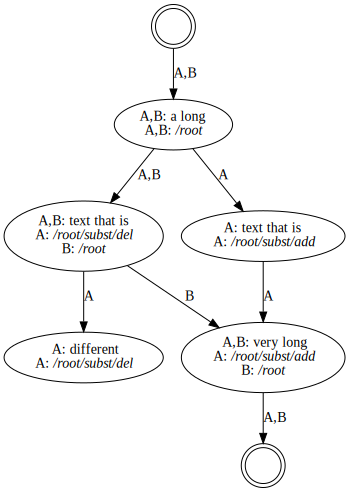

In [7]:
collationGraph.show()

# 2: Add en del branches hebben beide interessante tokens, er zijn geen duplicates.

Gewenste uitkomst:
                root volgen, daarna add, daarna del. Je switcht dan niet heen en weer van branches tijdens de alignment.

In [8]:
val wA = HC.importXMLWitness("A", "<root>a b <subst><add>c d e</add><del>f g</del></subst></root>")
val wB = HC.importXMLWitness("B", "<root>a b c d e f g</root>")
val collationGraph = HC.collate(wA,wB)
collationGraph.asASCIITable()

┌───┬──┬──┬──────┬──────┬─────┬──────┬─────┐
│[A]│a │b │[+] c │[+] d │[+] e│[-] f │[-] g│
├───┼──┼──┼──────┼──────┼─────┼──────┼─────┤
│[B]│a │b │c     │d     │e    │f     │g    │
└───┴──┴──┴──────┴──────┴─────┴──────┴─────┘

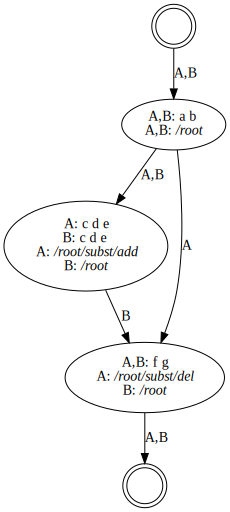

In [9]:
collationGraph.show()

# 3: Branches in branches

Gewenste uitkomst:
                root volgen, dan de eerste subst/add, dan de tweede subs/add.

In [10]:
val wA = HC.importXMLWitness("A", "<root>a b <subst><add>c d e<subst><add>f g h</add><del>bla die bla</del></subst></add><del>f g</del></subst></root>")
val wB = HC.importXMLWitness("B", "<root>a b c d e f g h</root>")
val collationGraph = HC.collate(wA,wB)
collationGraph.asASCIITable()

┌───┬──┬──┬──────┬──────┬─────┬────────┬────────┬───────┬──────┬─────┐
│[A]│  │  │      │      │     │[+]    f│[+]    g│[+]   h│      │     │
│   │a │b │[+] c │[+] d │[+] e│[-] bla │[-] die │[-] bla│[-] f │[-] g│
├───┼──┼──┼──────┼──────┼─────┼────────┼────────┼───────┼──────┼─────┤
│[B]│a │b │c     │d     │e    │f       │g       │h      │      │     │
└───┴──┴──┴──────┴──────┴─────┴────────┴────────┴───────┴──────┴─────┘

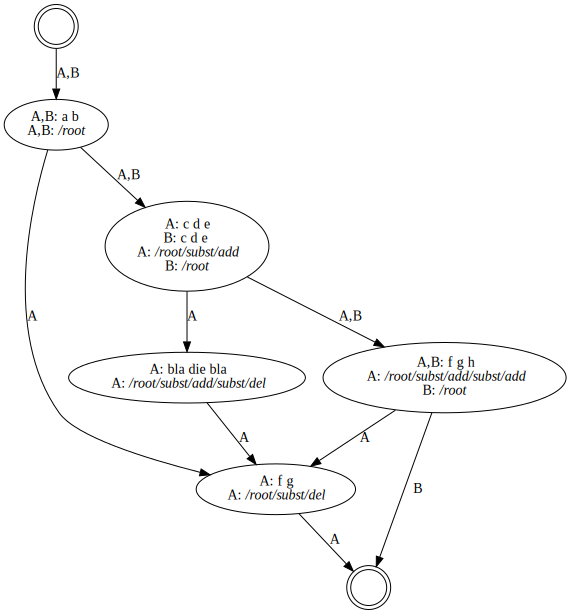

In [11]:
collationGraph.show()

# 4. De beste match kan ook deels na de branch liggen.

Gewenste uitkomst:
                root volgen, dan de add, daar c d uithalen, dan e f g h i j matchen na de branch, want de match na de branch is langer dan wat er in del staat.
        

In [12]:
val wA = HC.importXMLWitness("A", "<root>a b <subst><add>c d</add><del>e f</del></subst> e f g h i j</root>")
val wB = HC.importXMLWitness("B", "<root>a b c d e f g h i j</root>")
val collationGraph = HC.collate(wA,wB)
collationGraph.asASCIITable()

┌───┬──┬──┬──────┬─────┬──────┬─────┬─┬──┬──┬──┬──┬──┬─┐
│[A]│a │b │[+] c │[+] d│[-] e │[-] f│ │e │f │g │h │i │j│
├───┼──┼──┼──────┼─────┼──────┼─────┼─┼──┼──┼──┼──┼──┼─┤
│[B]│a │b │c     │d    │e     │f    │ │  │  │g │h │i │j│
└───┴──┴──┴──────┴─────┴──────┴─────┴─┴──┴──┴──┴──┴──┴─┘

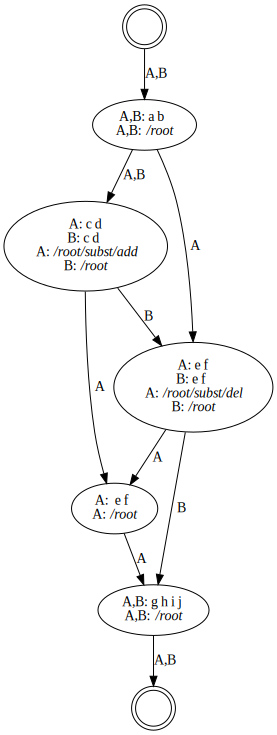

In [13]:
collationGraph.show()